In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/work/train_final.csv')
train.head()

,MOFname,volume [A^3],weight [u],density [g/cm^3],surface_area [m^2/g],gsa,vsa,smiles,MolWt,MolLogP,...,HBondAcceptorCount,RotatableBondCount,IsotopeAtomCount,AtomStereoCount,DefinedAtomStereoCount,UndefinedAtomStereoCount,BondStereoCount,DefinedBondStereoCount,UndefinedBondStereoCount,CovalentUnitCount
0,mof_unit_1,1116.667429,875.240600,1.301526,1139.828774,585.669052,1139.828774,OC(=O)OCC,90.078,0.7009,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,mof_unit_2,2769.503842,2211.697211,1.326090,603.610000,182.839127,477.993349,FOC,50.032,0.5173,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,1704.599832,1614.212392,COC(=O)O,76.051,0.3108,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,mof_unit_4,2205.198301,1304.638720,0.982408,1441.530000,3925.613160,1911.564582,S(=O)(=O)O,82.080,-0.9292,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,mof_unit_5,1137.800963,901.736120,1.316020,277.736656,197.658635,277.736656,CNO,47.057,-0.4050,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pretest = pd.read_csv('/work/test_28_final.csv')

In [ ]:
for col in ['metal_linker', 'organic_linker1', 'organic_linker2']:
    train[col] = train[col].astype('category')

In [ ]:
#train_x = train.drop(columns=['CO2_working_capacity [mL/g]','functional_groups','MOFname','smiles'])
#train_y = train['CO2_working_capacity [mL/g]']

train_x = train.drop(columns=['gsa','vsa','CO2_working_capacity [mL/g]','functional_groups','MOFname','smiles','MolecularFormula','CID','InChI','InChIKey','IUPACName'])
train_y = train['CO2_working_capacity [mL/g]']

In [ ]:
train_x = pd.get_dummies(train_x)
train_x_column = train_x.columns

In [ ]:
#X, Xval, y, yval = train_test_split(train_x,train_y, test_size =0.2)
sc = StandardScaler()
X = sc.fit_transform(train_x) 
#Xval = sc.transform (Xval)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(Xval)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
X
y

35639     84.154373
636       49.038135
54169     64.124810
2497      98.006277
38388    167.593140
            ...    
26862    187.675362
26137    197.740575
44710     51.544657
9665     187.171714
8335     191.425076
Name: CO2_working_capacity [mL/g], Length: 52110, dtype: float64

In [ ]:
for col in ['metal_linker', 'organic_linker1', 'organic_linker2']:
    pretest[col] = pretest[col].astype('category')
test_x= pretest.drop(columns=['MOFname'])
test_x = pd.get_dummies(test_x)
Xtest_column = test_x.columns
l = []
for col in train_x_column:
    if col not in Xtest_column:
        l.append(col)
listofzeros = [0] *17000
for col in l:
    test_x[col]= listofzeros
test_x.shape

(17000, 1623)

In [ ]:
test_x = test_x.reindex(columns = train_x_column)

In [ ]:
math.sqrt(len(yval))

114.1402645870422

# K-value

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights = 'distance', algorithm= 'ball_tree', leaf_size=40)

    model.fit(x_train, y)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(yval,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 62.265267166105055


KeyboardInterrupt: 

<AxesSubplot:>

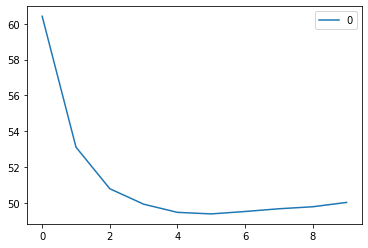

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import mean_absolute_error

### k=5

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y)
pred=model.predict(x_test)
#math.log10(mean_absolute_error(pred, yval))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred)
math.log10(mae_k32)

1.5430918146871033

### k=6, weights=distance

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance')
model.fit(x_train, y)
pred=model.predict(x_test)
#math.log10(mean_absolute_error(pred, yval))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred)
math.log10(mae_k32)

1.5345457914266878

### k=6, weights=distance, algorithm=&nbsp;'ball_tree'

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'ball_tree')
model.fit(x_train, y)
pred=model.predict(x_test)
#math.log10(mean_absolute_error(pred, yval))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred)
math.log10(mae_k32)

1.5345457914266878

### k=6, weights=distance, algorithm=&nbsp;'ball_tree'

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'distance', algorithm= 'ball_tree', leaf_size=20)
model.fit(x_train, y)
pred=model.predict(x_test)
#math.log10(mean_absolute_error(pred, yval))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred)
math.log10(mae_k32)

1.537777754819111

# Ensemble

In [ ]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 58.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# loading train data set in dataframe from train_data.csv file
#train = pd.read_csv('/work/train_final.csv')
#train.head()

,MOFname,volume [A^3],weight [u],density [g/cm^3],surface_area [m^2/g],gsa,vsa,smiles,MolWt,MolLogP,...,HBondAcceptorCount,RotatableBondCount,IsotopeAtomCount,AtomStereoCount,DefinedAtomStereoCount,UndefinedAtomStereoCount,BondStereoCount,DefinedBondStereoCount,UndefinedBondStereoCount,CovalentUnitCount
0,mof_unit_1,1116.667429,875.240600,1.301526,1139.828774,585.669052,1139.828774,OC(=O)OCC,90.078,0.7009,...,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,mof_unit_2,2769.503842,2211.697211,1.326090,603.610000,182.839127,477.993349,FOC,50.032,0.5173,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,1704.599832,1614.212392,COC(=O)O,76.051,0.3108,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,mof_unit_4,2205.198301,1304.638720,0.982408,1441.530000,3925.613160,1911.564582,S(=O)(=O)O,82.080,-0.9292,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,mof_unit_5,1137.800963,901.736120,1.316020,277.736656,197.658635,277.736656,CNO,47.057,-0.4050,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# loading train data set in dataframe from train_data.csv file
#df = pd.read_csv("train_data.csv")
 
# getting target data from the dataframe
#target = df["target"]
 
# getting train data from the dataframe
#train = df.drop("target")
 
# Splitting between train data into training and validation dataset
#X_train, X_test, y_train, y_test = train_test_split(
    #train, target, test_size=0.20)
 
# initializing all the model objects with default parameters
model_1 = LinearRegression()
#model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'ball_tree', leaf_size=40)
# training all the model on the training dataset
model_1.fit(x_train, y)
model_2.fit(x_train, y)
model_3.fit(x_train, y)
 


In [ ]:
# initializing all the model objects with default parameters
model_1 = LinearRegression()
#model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(x_train, y)
model_2.fit(x_train, y)
model_3.fit(x_train, y)
# predicting the output on the validation dataset
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
#print(mean_squared_error(y, pred_final))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred_final)
math.log10(mae_k32)
#1.9

In [ ]:
model_1 = LinearRegression()
#model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
#model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'ball_tree', leaf_size=40)

# training all the model on the training dataset
model_1.fit(X, y)
model_3.fit(X, y)
model_4.fit(X, y)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(Xval)
#pred_2 = model_2.predict(Xval)
pred_3 = model_3.predict(Xval)
pred_4 = model_4.predict(Xval)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_3+pred_4)/3.0
 
# printing the root mean squared error between real value and predicted value
#print(mean_squared_error(y, pred_final))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred_final)
math.log10(mae_k32)
#1.4022980679450625

In [ ]:
#model_1 = LinearRegression()
model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
#model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'ball_tree', leaf_size=40)

# training all the model on the training dataset
model_1.fit(X, y)
model_3.fit(X, y)
model_4.fit(X, y)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(Xval)
#pred_2 = model_2.predict(Xval)
pred_3 = model_3.predict(Xval)
pred_4 = model_4.predict(Xval)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_3+pred_4)/3.0
 
# printing the root mean squared error between real value and predicted value
#print(mean_squared_error(y, pred_final))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred_final)
math.log10(mae_k32)
#1.3384496213994015

In [ ]:
#model_1 = LinearRegression()
model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
#model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'ball_tree', leaf_size=50)

# training all the model on the training dataset
model_1.fit(X, y)
model_3.fit(X, y)
model_4.fit(X, y)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(Xval)
#pred_2 = model_2.predict(Xval)
pred_3 = model_3.predict(Xval)
pred_4 = model_4.predict(Xval)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_3+pred_4)/3.0
 
# printing the root mean squared error between real value and predicted value
#print(mean_squared_error(y, pred_final))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred_final)
math.log10(mae_k32)
#1.3383549191224315 depth=250
#1.3382672147382932 depth=300

In [ ]:
#model_1 = LinearRegression()
model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
#model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
model_4 = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'kd_tree', leaf_size=50)

# training all the model on the training dataset
model_1.fit(X, train_y)
model_3.fit(X, train_y)
model_4.fit(X, train_y)
 
# predicting the output on the validation dataset
#pred_1 = model_1.predict(Xval)
#pred_2 = model_2.predict(Xval)
#pred_3 = model_3.predict(Xval)
#pred_4 = model_4.predict(Xval)

# final prediction after averaging on the prediction of all 3 models
#pred_final = (pred_1+pred_3+pred_4)/3.0
 
# printing the root mean squared error between real value and predicted value
#print(mean_squared_error(y, pred_final))
#mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred_final)
#math.log10(mae_k32)


KNeighborsRegressor(algorithm='kd_tree', leaf_size=50, n_neighbors=6,
                    weights='distance')

In [ ]:
#model_1 = LinearRegression()
model_1 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=300), n_estimators=200, random_state=139)
#model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=300, random_state=123)
model_4 = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance', algorithm= 'brute', leaf_size=50)

# training all the model on the training dataset
model_1.fit(X, y)
model_3.fit(X, y)
model_4.fit(X, y)
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(Xval)
#pred_2 = model_2.predict(Xval)
pred_3 = model_3.predict(Xval)
pred_4 = model_4.predict(Xval)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_3+pred_4)/3.0
 
# printing the root mean squared error between real value and predicted value
#print(mean_squared_error(y, pred_final))
mae_k32 = mean_absolute_error(y_true=yval,y_pred=pred_final)
math.log10(mae_k32)


KernelInterrupted: Execution interrupted by the Jupyter kernel.

# ของเจน

In [ ]:
model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=300),n_estimators = 500, random_state = 139)
model.fit(X,train_y)
predict = model.predict(test_x)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:435: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Submission

In [ ]:
x_train_scaled = sc.fit_transform(X)
x_train = pd.DataFrame(x_train_scaled)

#x_test_scaled = sc.fit_transform(Xval)
#x_test = pd.DataFrame(x_test_scaled)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
pretest.shape

(17000, 49)

In [ ]:
for col in ['metal_linker', 'organic_linker1', 'organic_linker2']:
    pretest[col] = pretest[col].astype('category')
Xtest= pretest.drop(columns=['functional_groups','MOFname','smiles','MolecularFormula','CID','InChI','InChIKey','IUPACName'])

In [ ]:
Xtest = pd.get_dummies(Xtest)
Xtest_column = Xtest.columns

In [ ]:
l = []
for col in train_x_column:
    if col not in Xtest_column:
        l.append(col)
listofzeros = [0] *17000
for col in l:
    Xtest[col]= listofzeros
Xtest.shape

(17000, 169)

In [ ]:
Xtest = Xtest.reindex(columns = train_x_column)

In [ ]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#Xtest = scaler.fit_transform (Xtest)

Xtest = sc.transform(Xtest) 


In [ ]:
#pred_fi = model.predict(Xtest)


# predicting the output on the validation dataset
pred_1 = model_1.predict(Xtest)
#pred_2 = model_2.predict(Xval)
pred_3 = model_3.predict(Xtest)
pred_4 = model_4.predict(Xtest)

# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_3+pred_4)/3.0


In [ ]:
pred_fi = model.predict(Xtest)

NameError: name 'model' is not defined

In [ ]:
pred_final

array([164.54281298,  64.78346305,  74.75812205, ...,   1.86838955,
         3.50443364,  -4.14549746])

In [ ]:
df = pd.DataFrame()
df['id'] = pretest['MOFname']
df['CO2_working_capacity [mL/g]'] = pred_final
df['id'] = df['id'].apply(lambda x:x.replace("mof_unit_",""))
df

,id,CO2_working_capacity [mL/g]
0,68614,164.542813
1,68615,64.783463
2,68616,74.758122
3,68617,66.927417
4,68618,68.188738
...,...,...
16995,85609,-6.955296
16996,85610,0.863567
16997,85611,1.868390
16998,85612,3.504434


In [ ]:
df.to_csv('submission_1.csv',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d67ce81e-9cfa-4bad-a987-ead48a3cce00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>